<a href="https://colab.research.google.com/github/YeyoM/Time_Series_Forecast_ML/blob/main/Time_series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series and Forecasting

TImes series data is simply a collection of observations obtained through repeated measurements over time. Plot the points on a graph, and one of your axes would always be time.

Time series metrics refer to a piece of data that is tracked at an increment in time.

Examples of time series analysis:

- Electrical activity in the brain
- Rainfall measurements
- Stock prices
- Number of sunspots
- Annual retail sales
- Monthly subscribers
- Heartbeats per minute

Please note that all the examples avobe can be measured over a specific period of time (minutes, hours, months, etc).

So when we plot them we called them `time series`, they are an ordered sequence of values usually equally spaced over time.

When there is only a single value at each time-step, they are called `univariate time series`.

![](https://drive.google.com/uc?export=view&id=1F8cBqpmZkVtFgfh3F_8sN0Gr3E4CALrC)

Sometimes we can found examples where we will have more than one value for each time-step, these are called `multivariable time series`.

![](https://drive.google.com/uc?export=view&id=12dsoyRUOi1R0MqmFI8QrFetEXRQKNo7X)

As we can see, time series analysis could be applied on almost every aspect that we want to measure over time, so what does Forecasting is?

## Forecasting and Imputation

`Forecasting` is the action of predicting a future value over a period of time using time series analysis. We can predict the future price of a stock in market and become rich.

![](https://drive.google.com/uc?export=view&id=1DneLE5ENV8DG-bSjwt4JpdbVFY1cs8VH)

Or we can also predict the past price of a stock if there is missing information. This is called `Imputation`.

![](https://drive.google.com/uc?export=view&id=1ArfHhU4DSio5ry1ky3Eo81ERlqwQbSMQ)




## Common Patterns

As we saw, time series can have almost any shape nad form, but there are some common patterns that we can came across with when analyzing time series, here are a few of them, with code that illustrate each of them.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_series(time, series, format = "-", start = 0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)


### Trend
![](https://drive.google.com/uc?export=view&id=16mv7-pknTv5silfsCye8qywbdxKl6Mcp)

In [ ]:
def trend(time, slope = 0):
    return slope * time

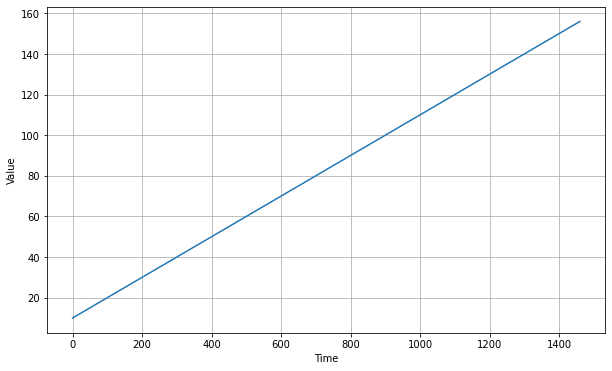

In [ ]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

In [ ]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [ ]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])


### Seasonality
![](https://drive.google.com/uc?export=view&id=1nzR7HCzRf2kuH4pVd-m-QiSHCgtNzLdG)


In [ ]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude = 1, phase = 0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

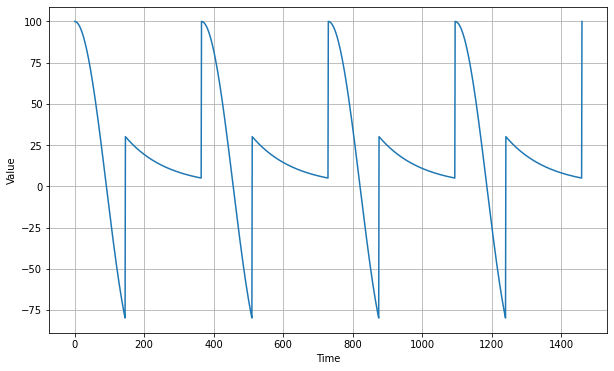

In [ ]:
amplitude = 100
series = seasonality(time, period = 365, amplitude = amplitude)

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()


### Noise
![](https://drive.google.com/uc?export=view&id=129biun6cQ8LNMNe-VrslXVYop-RAif2X)


In [ ]:
def white_noise(time, noise_level = 1, seed = None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

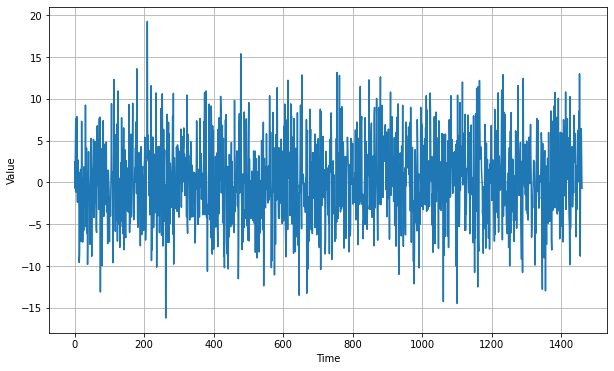

In [ ]:
noise_level = 5
noise = white_noise(time, noise_level, seed = 42)

plt.figure(figsize = (10, 6))
plot_series(time, noise)
plt.show()

### Trend + Seasonality + Noise
![](https://drive.google.com/uc?export=view&id=1xl7oqxxvIghHLNK6C4EsCqrRLtFuA-dW)

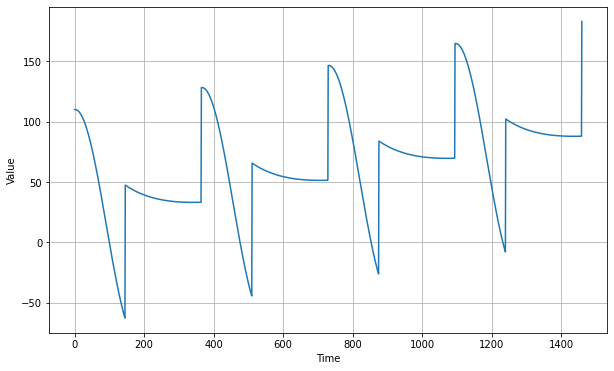

In [ ]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

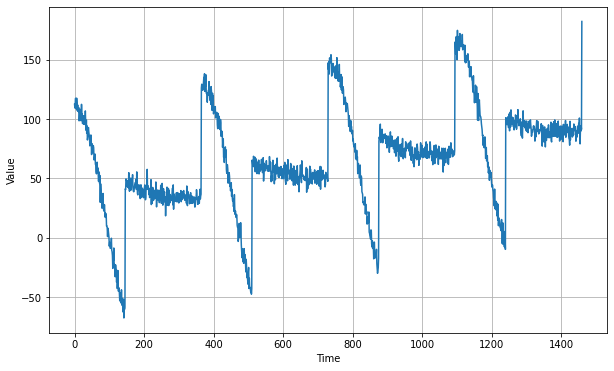

In [ ]:
series += noise

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

## Naive Forecasting

Naive forecasting consist in just taking the last value and asume the next value will be the same. Although it is so simple, sometimes can be really difficult to beat.

### How do we measure the performance of our forecasting model?

Similar to the models for image classification models, we have a `Training Period`, a `Validation Period`, and a `Test Period`. This type of partitioning is called fixed partitioning.

### Fixed Partitioning

If we have a time series where we have seasonality, we would generally choose to divide the periods in whole seasons like 1 year, 2 years for yearly seasonality. For example, a bad division would be to choose a year and a half, because some months would be more represented than others.

![](https://drive.google.com/uc?export=view&id=1t1pDKDp_yHKsyBJmeueahqTQhNQYOA0h)

Then we train the model on the training period, and we evaluate it on the validation period.

Then as an extra-step we can train it one more time, but now on the test period and the validation period, and test it on the training period to give us an idea of how well our model will perform in production.

After that, one last step should be train the model on the full time-series.

Another different approach is just to have a Traaining period and a validation period and forget about the test period because it is in the future.

![](https://drive.google.com/uc?export=view&id=1iryosWIAeHgeAunKuul3LUB513Mi5plW)

### Roll-Foward Partitioning

In this approach we start with a short training period and we gradually increase it. At each iteration we train the model as usual and we use it to forecast the following days or the following week as the validation period. 

THis approach would take longer to train, but the benefit is that it would likely be more presice on production.


### Naive Forecasting in code

First, we need to determine the training period and the validation period for our really simple model.



In [ ]:
# We will use the last time-series where we combined trend, seasonality and noise
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
# As we discuss before, naive forecast is to take the last value and
# predict that it will be the next value on the time-series
naive_forecast = series[split_time - 1:-1]

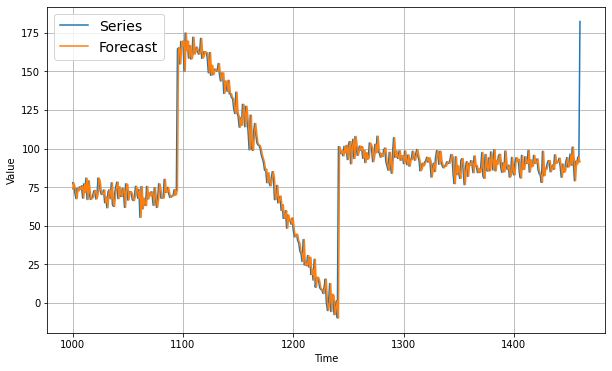

In [ ]:
plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, naive_forecast, label = "Forecast")

It looks as if our model were really accurate, but lets zoom in to look exactly what is happening.

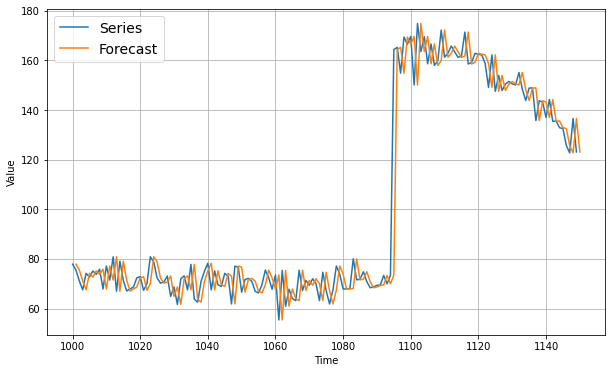

In [ ]:
plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid, start = 0, end = 150, label="Series")
plot_series(time_valid, naive_forecast, start = 1, end = 151, label="Forecast")

You can see that the naive forecast lags 1 step behind the time series.

In [ ]:
# Now let's compute the mean absolute error between the 
# forecasts and the predictions in the validation period:
errors = naive_forecast - x_valid

# Mean Squared Error
mse = np.square(errors).mean()
print(mse)

# Mean Absolute Error
mae = np.abs(errors).mean()
print(mae)

# Mean Absolute Porcentage Error
mape = np.abs(errors / x_valid).mean()
print(mape)

115.48429381405701
6.363568314191619
0.25341007389981124


In [ ]:
# Use Keras to calculate Naive Forecast MAE
import tensorflow as tf

tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy()

6.3635683141916175

## Another Forecast methods

### Moving Average

THe moving Average is just the mean of the past values, for example, the last 30 days, this eliminate most of the noise, but can't anticipate seasonality or trends.

So for the previous example it performs worse than the naive forecast. MAE = 7.1

![](https://drive.google.com/uc?export=view&id=10CzlnTdMmf5Q7IQF8herWi5ezqhUD6vz)

### How can we fix this?

Remove trend and Seasonality from the time-series. We can use a Technique called `Differencing`. Instead of studying time-series itself, we study the difference between the value at time t, and the value one year earlier for example. (Blue)

Then we can use a moving average to forecast this time-series. (Orange)

![](https://drive.google.com/uc?export=view&id=13Wt8_10DXbIDp0bq3wSRLJKGSYSDsDPt)

But as we can see, this is not the original time-series we had, so what we would do is to add back the value at time t - 365 (1 year).

![](https://drive.google.com/uc?export=view&id=1tUIs75YuHFygsZ1brKbhdrpyT-9QV877)

THis results on a MAE of 5.8

As we can see, this forecast still has a lot of noise. This noise come from the past values that we added back to the forecast.

We can apply moving average to this new forecast, which will lead to a much more smoother forecast and a MAE of 4.6 over the validation period.

![](https://drive.google.com/uc?export=view&id=1uQaD5JC6VhQJKPojN-OgOcEN3a1RWP1P)

## Moving Average in code

In [ ]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

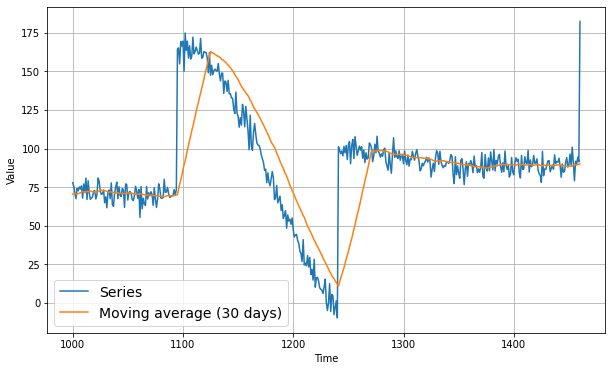

In [ ]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, moving_avg, label = "Moving average (30 days)")

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy()

14.133128716198406

That's worse than naive forecast! The moving average does not anticipate trend or seasonality, so let's try to remove them by using differencing. Since the seasonality period is 365 days, we will subtract the value at time t – 365 from the value at time t.

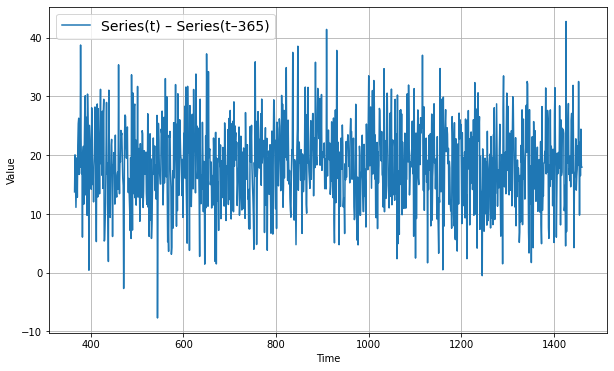

In [ ]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize = (10, 6))
plot_series(diff_time, diff_series, label = "Series(t) – Series(t–365)")
plt.show()

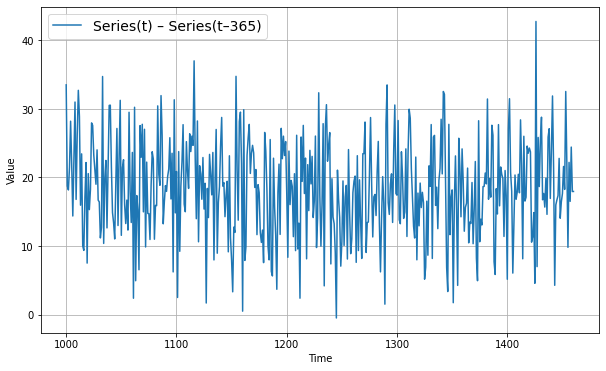

In [ ]:
# Focusing on the validation Period
plt.figure(figsize = (10, 6))
plot_series(time_valid, diff_series[split_time - 365:], label = "Series(t) – Series(t–365)")
plt.show()

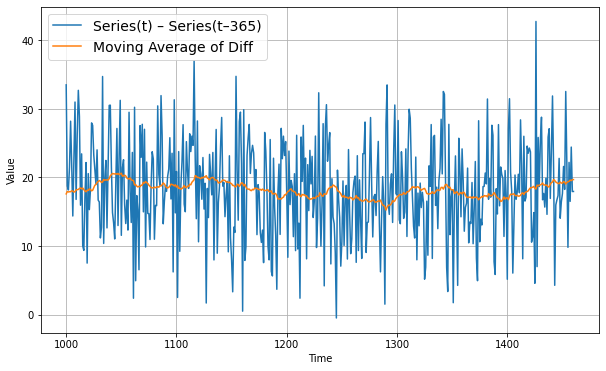

In [ ]:
# Now that we dont have trend and seasonality
# is a grat moment to apply moving average

diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize = (10, 6))
plot_series(time_valid, diff_series[split_time - 365:], label = "Series(t) – Series(t–365)")
plot_series(time_valid, diff_moving_avg, label = "Moving Average of Diff")
plt.show()

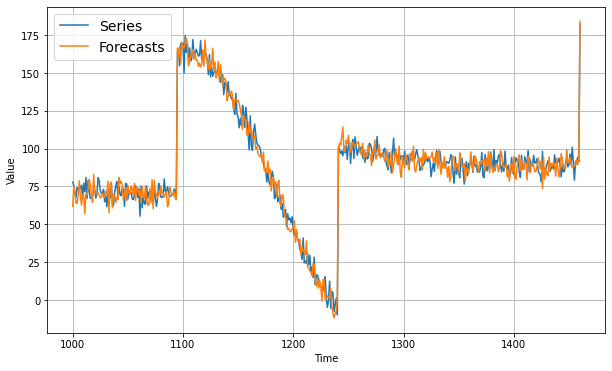

In [ ]:
# Now let's bring back the trend and seasonality 
# by adding the past values from t – 365

diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, diff_moving_avg_plus_past, label = "Forecasts")
plt.show()

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy()

5.839310562995894

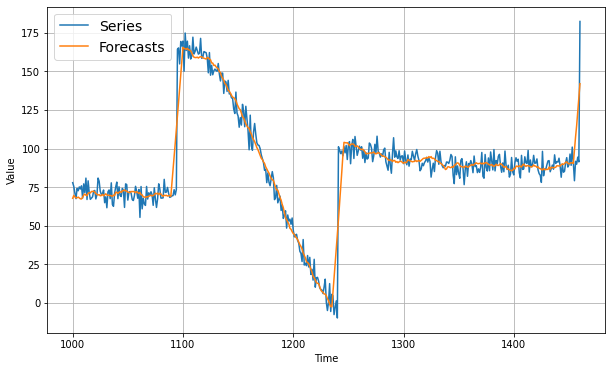

In [ ]:
# Better than naive forecast, good. However the forecasts look 
# a bit too random, because we're just adding past values, which
# were noisy. Let's use a moving averaging on past values to 
# remove some of the noise

diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, diff_moving_avg_plus_smooth_past, label="Forecasts")
plt.show()

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy()

5.477529801734131